# Range Minimum Query (easy)

## Problem Statement

You are given an array `nums` containing `n` integers and a 2D array `queries` of length `q`, where queries\[i\] = \[starti, endi\], representing a starting and ending range (inclusive).

Return an array of size `q`, where each element is the `minimum` value in the respective range from `nums`.

### Examples

Example 1:

*   Input: nums = \[2, 6, 1, 12, 9, 5, 3, 7\], queries = \[\[0, 3\], \[2, 5\], \[0, 1\], \[3, 7\], \[0, 7\], \[4, 6\], \[4, 5\]\]
*   Output: \[1, 1, 2, 3, 1, 3, 5\]
*   Justification:
    *   For the range `[0, 3]`, the minimum is `1`.
    *   For the range `[2, 5]`, the minimum is `1`.
    *   For the range `[0, 1]`, the minimum is `2`.
    *   For the range `[3, 7]`, the minimum is `3`.
    *   For the range `[0, 7]`, the minimum is `1`.
    *   For the range `[4, 6]`, the minimum is `3`.
    *   For the range `[4, 5]`, the minimum is `5`.

Example 2:

*   Input: nums = \[4, 8, 6, 2, 10, 15\], queries = \[\[1, 3\], \[0, 2\], \[2, 4\], \[3, 5\]\]
*   Output: \[2, 4, 2, 2\]
*   Justification:
    *   For the range `[1, 3]`, the minimum is `2`.
    *   For the range `[0, 2]`, the minimum is `4`.
    *   For the range `[2, 4]`, the minimum is `2`.
    *   For the range `[3, 5]`, the minimum is `2`.

Example 3:

*   Input: nums = \[11, 13, 5, 8, 10, 12, 7, 14\], queries = \[\[0, 4\], \[1, 3\], \[2, 5\], \[3, 6\]\]
*   Output: \[5, 5, 5, 7\]
*   Justification:
    *   For the range `[0, 4]`, the minimum is `5`.
    *   For the range `[1, 3]`, the minimum is `5`.
    *   For the range `[2, 5]`, the minimum is `5`.
    *   For the range `[3, 6]`, the minimum is `7`.

Constraints:

*   0 <= starti < endi <= 1000

In [27]:
import math

class Solution:
    def buildtree(self, arr, node, start, end, tree):
        if start == end:
            tree[node] = arr[start]
        else:
            mid = (start + end)//2
            self.buildtree(arr, node*2 , start, mid, tree)
            self.buildtree(arr, node*2 + 1, mid + 1, end, tree)

            tree[node] = min(tree[node*2], tree[2*node + 1])
            

    def query(self, arr, node, start, end, L, R, tree):
        # No overlap
        if L > end or R < start:
            return float('inf')

        if L <= start and R >= end:
            return tree[node]

        mid = (start + end)//2

        leftmin = self.query(arr, node*2, start, mid, L, R, tree)
        rightmin = self.query(arr, node*2 + 1, mid + 1, end, L, R, tree)

        return min(leftmin, rightmin)

    def processQueries(self, nums, queries):
        tree = [0]* (4 * len(nums))
        self.buildtree(nums, 1, 0, len(nums) - 1, tree)
        results  = []

        for L, R in queries:
            results.append(self.query(nums, 1, 0, len(nums) - 1, L, R, tree))

        return results

In [24]:
nums = [2, 6, 1, 12, 9, 5, 3, 7]
queries = [[0, 3], [2, 5], [0, 1], [3, 7], [0, 7], [4, 6], [4, 5]]
sol = Solution()
sol.range_min_query(nums, queries)

[0, 1, 1, 3, 2, 1, 5, 3, 2, 6, 1, 12, 9, 5, 3, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


[1, 1, 2, 3, 1, 3, 5]

In [25]:
nums = [4, 8, 6, 2, 10, 15]
queries = [[1, 3], [0, 2], [2, 4], [3, 5]]
sol = Solution()
sol.range_min_query(nums, queries)

[0, 2, 4, 2, 4, 6, 2, 15, 4, 8, 0, 0, 2, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


[2, 4, 2, 2]

In [26]:
nums = [11, 13, 5, 8, 10, 12, 7, 14]
queries = [[0, 4], [1, 3], [2, 5], [3, 6]]
sol = Solution()
sol.range_min_query(nums, queries)

[0, 5, 5, 7, 11, 5, 10, 7, 11, 13, 5, 8, 10, 12, 7, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


[5, 5, 5, 7]

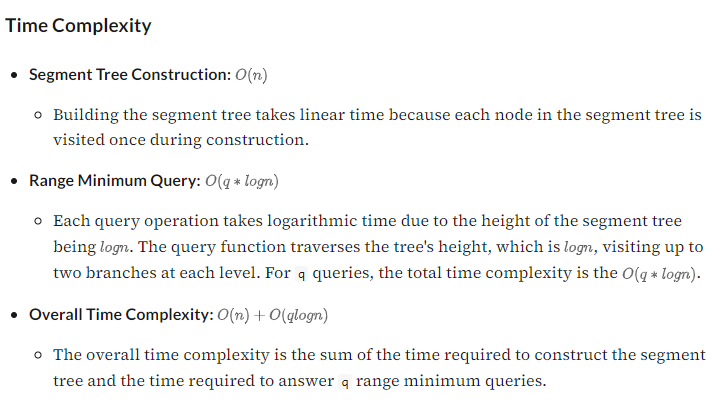

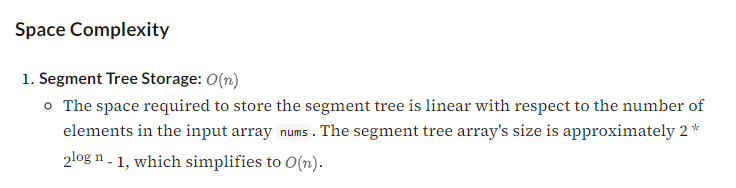